In [1]:
import pandas as pd



In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,Unnamed: 0,text
0,0,"Now, I won't deny that when I purchased this o..."
1,1,"The saddest thing about this ""tribute"" is that..."
2,2,Last night I decided to watch the prequel or s...
3,3,I have to admit that i liked the first half of...
4,4,I was not impressed about this film especially...


In [4]:
data.drop("Unnamed: 0",axis="columns",inplace=True)

In [5]:
data.head()

,text
0,"Now, I won't deny that when I purchased this o..."
1,"The saddest thing about this ""tribute"" is that..."
2,Last night I decided to watch the prequel or s...
3,I have to admit that i liked the first half of...
4,I was not impressed about this film especially...


In [6]:
print("Number of rows in data{}".format(data.shape[0]))

Number of rows in data25000


In [7]:
data.columns = {"Review_Text"}

In [8]:
data.columns

Index(['Review_Text'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


In [10]:
data.duplicated().sum()

96

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
blanks = []
for index in data["Review_Text"]:
    if index.isspace() == True:
        blanks.append(index)

In [14]:
print(blanks)

[]


In [15]:
import nltk
nltk.download("vader_lexicon")



[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


False

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyze=SentimentIntensityAnalyzer()

In [17]:
review = "That was a crazy movie. I definetly loved this movie"

In [18]:
sentanalyze.polarity_scores(review)

{'neg': 0.195, 'neu': 0.488, 'pos': 0.317, 'compound': 0.3612}

In [19]:
data["Scores"] = data["Review_Text"].apply(lambda review:sentanalyze.polarity_scores(review))

In [20]:
data.head()

,Review_Text,Scores
0,"Now, I won't deny that when I purchased this o...","{'neg': 0.086, 'neu': 0.716, 'pos': 0.198, 'co..."
1,"The saddest thing about this ""tribute"" is that...","{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com..."
2,Last night I decided to watch the prequel or s...,"{'neg': 0.038, 'neu': 0.867, 'pos': 0.094, 'co..."
3,I have to admit that i liked the first half of...,"{'neg': 0.135, 'neu': 0.715, 'pos': 0.15, 'com..."
4,I was not impressed about this film especially...,"{'neg': 0.106, 'neu': 0.754, 'pos': 0.14, 'com..."


In [21]:
data["compound"] = data["Scores"].apply(lambda f:f["compound"])

In [22]:
data.head()

,Review_Text,Scores,compound
0,"Now, I won't deny that when I purchased this o...","{'neg': 0.086, 'neu': 0.716, 'pos': 0.198, 'co...",0.9410
1,"The saddest thing about this ""tribute"" is that...","{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com...",-0.9367
2,Last night I decided to watch the prequel or s...,"{'neg': 0.038, 'neu': 0.867, 'pos': 0.094, 'co...",0.8002
3,I have to admit that i liked the first half of...,"{'neg': 0.135, 'neu': 0.715, 'pos': 0.15, 'com...",-0.4825
4,I was not impressed about this film especially...,"{'neg': 0.106, 'neu': 0.754, 'pos': 0.14, 'com...",0.6718


In [23]:
data["compound_posorneg"] = data["compound"].apply(lambda score:"Positive" if score >=0 else "Negative")

In [24]:
data = data[["Review_Text","compound_posorneg"]]

In [25]:
data.columns = ["Review_Text","Review"]

In [26]:
data.head()

,Review_Text,Review
0,"Now, I won't deny that when I purchased this o...",Positive
1,"The saddest thing about this ""tribute"" is that...",Negative
2,Last night I decided to watch the prequel or s...,Positive
3,I have to admit that i liked the first half of...,Negative
4,I was not impressed about this film especially...,Positive


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,5))
sns.set(style="darkgrid",font_scale=1.2)
sns.countplot(data.Review)
plt.show()


ValueError: could not convert string to float: 'Positive'

<Figure size 600x500 with 0 Axes>

In [ ]:
X=data["Review_Text"]
y=data["Review"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
textclf = Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])

In [ ]:
textclf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
preds = textclf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(accuracy_score(y_test,preds))

0.8303553503312587


In [ ]:
cm = confusion_matrix(y_test,preds)

In [ ]:
print(cm)

[[2369  963]
 [ 727 5903]]


In [ ]:
import matplotlib
matplotlib.rc("figure",figsize =(10,10))

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=[False,True])

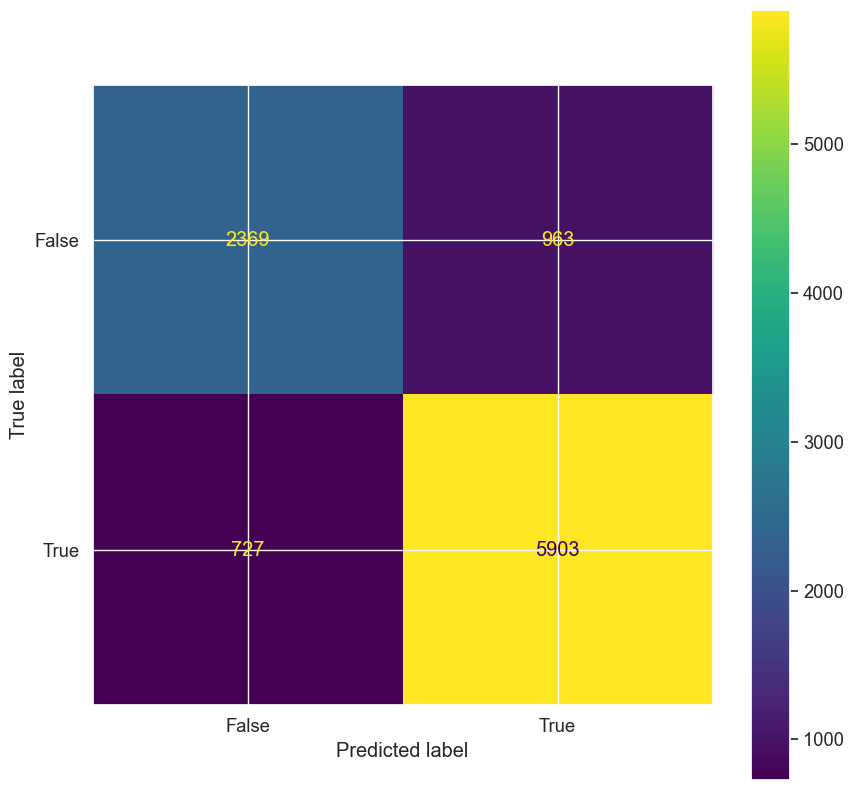

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
newreview =[("Movie was perfect")]
textclf.predict(newreview)

array(['Positive'], dtype=object)